<a href="https://colab.research.google.com/github/julesripoll/crypto-trading-bot/blob/jules_branch/reset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.nn.functional as F


class QNetwork(nn.Module):
    """Q-network for the DQN agent.
    Parameters
    ----------
    state_shape: Shape of the state
    action_size: Number of available actions
    """
    def __init__(self, state_shape, action_size: int):
        super(QNetwork, self).__init__()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.conv1 = nn.Conv2d(in_channels=state_shape[-1], out_channels=16, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.globmaxpool = nn.AdaptiveMaxPool2d(output_size=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64, 512)
        # self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(512, action_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass of the network.
        
        Parameters
        ----------
        x: Tensor of shape (batch_size, *state_shape)
        """
        out = torch.permute(x, (0,3,1,2))  # put channels first
        out = F.relu(self.conv1(out))
        # out = self.maxpool(out)
        out = F.relu(self.conv2(out))
        # out = self.maxpool(out)
        out = F.relu(self.conv3(out))
        out = self.globmaxpool(out)
        out = self.flatten(out)
        out = F.relu(self.fc1(out))
        # out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 19.0 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
!rm -rf /content/crypto-trading-bot

Cloning into 'crypto-trading-bot'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 261 (delta 98), reused 103 (delta 68), pack-reused 95
Receiving objects: 100% (261/261), 2.79 MiB | 17.71 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [6]:
import yfinance as yf

nsdq = yf.Ticker("^IXIC")

In [7]:
hist = nsdq.history(start='2020-1-1',end='2022-1-1')

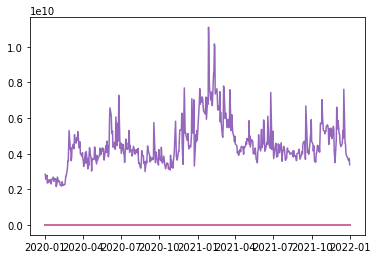

In [8]:
plt.plot(hist)

In [9]:
print(hist)

                    Open          High           Low         Close  \
Date                                                                 
2020-01-02   9039.459961   9093.429688   9010.889648   9092.190430   
2020-01-03   8976.429688   9065.759766   8976.429688   9020.769531   
2020-01-06   8943.500000   9072.410156   8943.500000   9071.469727   
2020-01-07   9076.639648   9091.929688   9042.549805   9068.580078   
2020-01-08   9068.030273   9168.889648   9059.379883   9129.240234   
...                  ...           ...           ...           ...   
2021-12-27  15696.830078  15871.400391  15696.830078  15871.259766   
2021-12-28  15895.200195  15901.469727  15757.070312  15781.719727   
2021-12-29  15794.919922  15821.809570  15679.849609  15766.219727   
2021-12-30  15758.980469  15868.089844  15729.160156  15741.559570   
2021-12-31  15722.910156  15777.429688  15643.940430  15644.969727   

                Volume  Dividends  Stock Splits  
Date                                   

In [10]:
#au dessus c'est full brouillon

In [11]:
!cd /content/crypto-trading-bot

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
!git clone -b jules_branch https://github.com/julesripoll/crypto-trading-bot.git #d'abord se placer au bon endroit dans gdrive pour le cloner

ModuleNotFoundError: ignored

In [ ]:
#cellule de constitution du jeu de données final

In [ ]:
#initialisation de l'environnement avec le dataset

In [ ]:
#quelques steps randoms prises dans cet environnement. faire un plot de rewards

In [ ]:
#instanciation de l'agent puis entrainement. plot de reward

In [ ]:
#test de l'agent plot de rewards.